# Logistic Regression
Logistic regression is a statistical method used for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (where there are only two possible outcomes). It is used extensively in various fields, including machine learning, most notably for binary classification problems.

## 1. Logistic Regression

Logistic Regression is used for binary classification problems. It predicts the probability of an event occurrence based on the given independent variables. The core of logistic regression is the logistic function, represented as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $\sigma(z)$ is the probability of the event occurrence, $e$ is the base of the natural logarithm, and $ z $ is the linear combination of the input features, given by:

$$
z = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n
$$

In this equation,$ \beta_0, \beta_1, \ldots, \beta_n$ are the parameters of the model, where $ \beta_0 $ is the intercept and $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients of the respective input features $ x_1, x_2, \ldots, x_n $.

## 2. The Binary Cross Entropy (BCE) Loss Function

### 2.1 Likelihood Function
In a binary classification problem, we model the probability of observing the data given the parameters of the model. This is called the likelihood function. For a set of independent observations, the likelihood L is the product of individual probabilities:

$$L(\theta) = \prod_{i=1}^{N} p_i^{y_i} (1 - p_i)^{1 - y_i}$$

* $ L(\theta)$ is the likelihood of the parameters $ \theta $. 
* The product $ \prod $ runs over all observations $ i$ from 1 to $ N $. 
* $ p_i $ is the predicted probability for the $ i $-th observation.
* $ y_i$ is the actual label for the $ i $-th observation, which can be either 0 or 1. 
* $ p_i^{y_i} $ and $(1 - p_i)^{1 - y_i} $ represent the probability of the $ i $-th observation being correctly classified, raised to the power of the actual label and its complement, respectively. 

### 2.2 Log-Likelihood
We often use the log of the likelihood because it transforms the product into a sum, making it easier to handle, especially computationally.
The log-likelihood $ \log(L(\theta)) $ becomes:
$$
\log(L(\theta)) = \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

### 2.3 Negative Log-Likelihood
Maximizing the log-likelihood is equivalent to minimizing its negative. Therefore, the objective function in logistic regression, representing the loss, is the negative log-likelihood:
$$
-\log(L(\theta)) = -\sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$
This comes to **Binary Cross Entropy Loss function**.

### 2.4 Binary Cross Entropy Loss Function
The Binary Cross Entropy (BCE) Loss Function, also known as log loss, is widely used in binary classification models. It measures the performance of a model whose output is a probability value between 0 and 1. The BCE loss quantifies the difference between the predicted probabilities and the actual labels. It is defined as follows:

$$
\text{BCE Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]
$$

Where:
 * N  is the number of observations.
 * $y_i$  is the actual label of the $i $-th observation, which can be 0 or 1.
 * $ p_i$ is the predicted probability of the $ i $-th observation being classified as class 1.
 * The log function refers to the natural logarithm.

This function penalizes predictions that are confidently incorrect more heavily, due to its logarithmic components. As the predicted probability diverges from the actual label, the loss increases exponentially, which is a key characteristic for effective classification models.

* The term $y_i \cdot \log(p_i)$ contributes to the loss if the actual label is 1. This part of the formula calculates the loss when the true label $ y_i $ is 1. The loss increases as the predicted probability $ p_i $ diverges from 1.
* The term $(1 - y_i) \cdot \log(1 - p_i) $ contributes to the loss if the actual label is 0. This part calculates the loss for the instances where the true label $ y_i $ is 0. The loss increases as the predicted probability $p_i $ moves away from 0.

## 3. Gradient Descent 
We again implement gradient Descent as the optimization algorithm used for minimizing the Binary Cross Entropy Loss Function.

### 3.1 Derivative of BCE
The Binary Cross Entropy Loss for a single observation is given by:
$$
\text{BCE Loss} = -\left[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})\right]
$$

The derivative of the sigmoid function $ \sigma(z) $ with respect to $ z $ is:
$$
\sigma'(z) = \sigma(z)(1 - \sigma(z))
$$
The derivative of the BCE Loss with respect to weight $ w_j $ is calculated using the chain rule:
$$
\frac{\partial}{\partial w_j} \text{BCE Loss} = \frac{\partial \text{BCE Loss}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w_j}
$$

Breaking it down:

* $ \frac{\partial \text{BCE Loss}}{\partial \hat{y}} $is the derivative of BCE Loss with respect to $ \hat{y} $.
* $ \frac{\partial \hat{y}}{\partial z} $ is $ \sigma'(z) $, the derivative of the sigmoid function.
* $\frac{\partial z}{\partial w_j} $ is $ x_j $, the $ j $-th input feature.

After substituting and simplifying, this becomes:
$$
\frac{\partial}{\partial w_j} \text{BCE Loss} = (\hat{y} - y) x_j
$$


For the bias, the derivative is calculated similarly:
$$
\frac{\partial}{\partial b} \text{BCE Loss} = \frac{\partial \text{BCE Loss}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial b}
$$
Here,$\frac{\partial z}{\partial b} $ is 1, so the derivative simplifies to:
$$
\frac{\partial}{\partial b} \text{BCE Loss} = (\hat{y} - y)
$$

With above partial derivatives we can train our logistic regression neuron in the exact same way as our previous models by implementing stochastic gradient descent. Now we can build our algorithm.

## 4. Data implementation

### 4.1 Data visualization and standardization
In this section, we utilized a publicly accessible dataset from Kaggle, originating from a continuous cardiovascular research project conducted in Framingham, Massachusetts. This dataset's primary objective is to forecast the 10-year risk of coronary heart disease (CHD) in patients. It contains detailed information on patients, encompassing more than 4,000 entries and 15 different attributes.

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("framingham.csv")
data=data.dropna()
X = data.iloc[:,1:15]
X_scaler = StandardScaler()
X = pd.DataFrame(X_scaler.fit_transform(X))
y = data["TenYearCHD"]
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [5]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def BCE_loss(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
class Logistic_GD(object):   
    """
    Logistic_GD is a class for performing logistic regression using Stochastic Gradient Descent (SGD).

    This class allows for customizable activation and cost functions, making it versatile for different logistic regression scenarios.

    Attributes:
        activation_function (callable): The activation function used for logistic regression. 
                                        This function should take a single argument and return a single value.
        cost_function (callable): The cost function used for calculating the loss during training. 
                                  This function should take two arguments (true value and predicted value) 
                                  and return a single value representing the loss.
    
    Methods:
        logistic_regression_SGD(X, y, learning_rate, iterations): Performs logistic regression on the provided dataset.
            Parameters:
                X (array-like): Feature dataset.
                y (array-like): Target values.
                learning_rate (float, optional): Learning rate for SGD. Default is 0.01.
                iterations (int, optional): Number of iterations for SGD. Default is 10000.
            Returns:
                list: A list of loss values for each iteration.

    Example:
        >>> activation_func = lambda z: 1 / (1 + np.exp(-z)) # Sigmoid function
        >>> cost_func = lambda y_true, y_pred: -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        >>> model = Logistic_GD(activation_func, cost_func)
        >>> X, y = load_data() # assuming load_data() is a function that loads your data
        >>> losses = model.logistic_regression_SGD(X, y)
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function
    def logistic_regression_SGD(self,X, y, learning_rate=0.01, iterations=10000):
        m, n = X.shape
        weights = np.zeros(n)
        bias = 0
        self.Loss_=[]
        for _ in range(iterations):
            loss = 0
            for X_i, y_i in zip(X, y):
                y_hat = sigmoid(np.dot(X_i, weights) + bias)
                dw = (y_hat - y_i) * X_i
                db = y_hat - y_i
                weights -= learning_rate * dw
                bias -= learning_rate * db
                y_hat = self.activation_function(np.dot(X_i, weights) + bias)
                loss +=  self.cost_function(y_i,y_hat)
            self.Loss_.append(loss/m)
        return self.Loss_


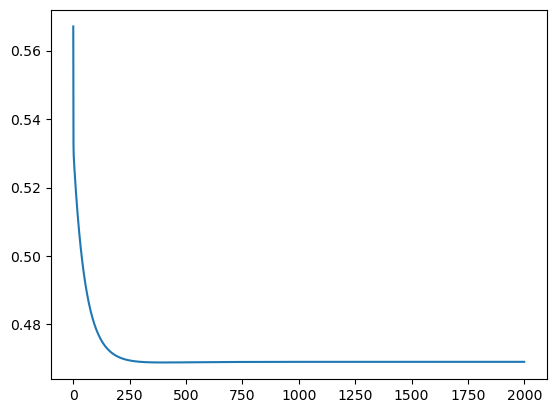

In [10]:
node = Logistic_GD(sigmoid, BCE_loss)
node.logistic_regression_SGD(X, y, learning_rate = 0.01, iterations = 2000)
plt.plot(node.Loss_)
